## 다중분류

- 원핫인코딩으로 

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import numpy as np
import sys
import tensorflow as tf

In [16]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [17]:
print("train set of image: %d 개" % (X_train.shape[0]))
print("test set of image: %d 개" % (X_test.shape[0]))

train set of image: 60000 개
test set of image: 10000 개


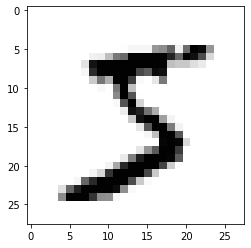

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [19]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d 3' % i)
    sys.stdout.write('\n')

0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 3
0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 3
0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 3
0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 3
0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 3
0 30 30 30 30 30 30 30 30 30 30 30 33 318 318 318 3126 3136 3175 326 3166 3255 3247 3127 30 30 30 30 3
0 30 30 30 30 30 30 30 330 336 394 3154 3170 3253 3253 3253 3253 3253 3225 3172 3253 3242 3195 364 30 30 30 30 3
0 30 30 30 30 30 30 349 3238 3253 3253 3253 3253 3253 3253 3253 3253 3251 393 382 382 356 339 30 30 30 30 30 3
0 30 30 30 30 30 30 318 3219 3253 3253 3253 3253 3253 3198 3182 3247 3241 30 30 30 30 30 30 30 30 30 30 3
0 30 30 30 30 30 30 30 380 3156 3107 3253 3253 3205 311 30 343 3154 30 30 30 30 30 30 30 30 30 30 3
0 30 30 30 30 30 30 30 30 314 31 3154 3253

In [21]:
print(X_train[0].shape[0])
#첫번째 데이터의 픽셀수가 28픽셀

28


In [22]:
print(X_train[0].shape[1])

28


In [23]:
#데이터 전처리
#mnist데이터는 원래 3차원데이터
#2차원으로 바꾸려면 전체개수는 그대로 써준다784로 써도됨
X_train = X_train.reshape(X_train.shape[0],-1) 
X_train = X_train.astype(float)
#입력피쳐값의 스케일을 0-1사이로 맞추기
X_train=X_train / 255

In [24]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [25]:
X_test = X_test.reshape(X_test.shape[0],-1).astype(float) / 255

In [26]:
print(Y_train[0])

5


In [27]:
Y_train = utils.to_categorical(Y_train,10)
Y_test = utils.to_categorical(Y_test,10)

In [28]:
print(Y_train[0]) #원핫인코딩

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [30]:
# 데이터 전처리가 끝났고 나머지 작업

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation = 'relu')) 
# 입력값은 784로, 이것을 512로 줄여준다. 
model.add(Dense(10, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                              monitor='val_loss',
                              verbose=1, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
#100까지 참아라

In [35]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15198, saving model to ./model\01-0.1520.hdf5

Epoch 00002: val_loss improved from 0.15198 to 0.10631, saving model to ./model\02-0.1063.hdf5

Epoch 00003: val_loss improved from 0.10631 to 0.08703, saving model to ./model\03-0.0870.hdf5

Epoch 00004: val_loss improved from 0.08703 to 0.07544, saving model to ./model\04-0.0754.hdf5

Epoch 00005: val_loss improved from 0.07544 to 0.06849, saving model to ./model\05-0.0685.hdf5

Epoch 00006: val_loss did not improve from 0.06849

Epoch 00007: val_loss improved from 0.06849 to 0.06496, saving model to ./model\07-0.0650.hdf5

Epoch 00008: val_loss did not improve from 0.06496

Epoch 00009: val_loss improved from 0.06496 to 0.06316, saving model to ./model\09-0.0632.hdf5

Epoch 00010: val_loss did not improve from 0.06316

Epoch 00011: val_loss improved from 0.06316 to 0.06316, saving model to ./model\11-0.0632.hdf5

Epoch 00012: val_loss did not improve from 0.06316

Epoch 00013: val_loss did n

In [36]:
print("Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9828
Test Accuracy: 0.9828


<function matplotlib.pyplot.show(close=None, block=None)>

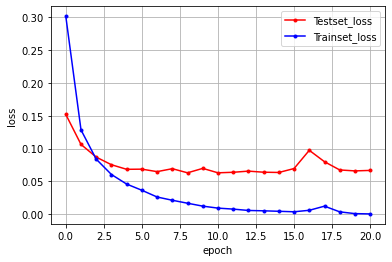

In [39]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show